In [1]:
import numpy as np
from PIL import Image
import pandas as pd
from collections import Counter
from random import shuffle

In [2]:
train_data = np.load('training_data.npy')

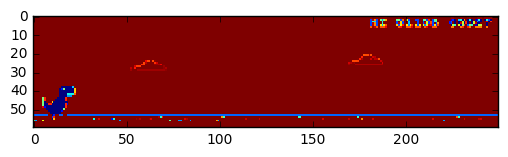

In [3]:
from matplotlib import pyplot as plt
plt.imshow(train_data[10][0], interpolation='nearest')
plt.show()

In [4]:
len(train_data)

11000

In [5]:
train_data.shape

(11000, 2)

In [6]:
for t in train_data[:5]:
        print (t[1])

[0, 1, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]


Skip 1st datapoint (Up keypress to start the game)

In [7]:
train_data = train_data[1:]

In [8]:
for t in train_data[:1]:
        print (t[1])

[1, 0, 0]


In [9]:
len(train_data)

10999

In [10]:
img = np.array(train_data[1][0])

In [11]:
img.shape

(60, 250)

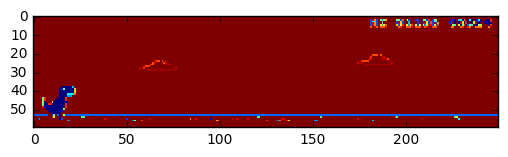

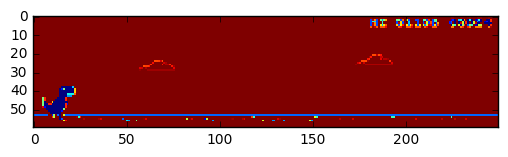

In [12]:
for t in train_data[:2]:
    #print (t[0])
    from matplotlib import pyplot as plt
    plt.imshow(t[0], interpolation='nearest')
    plt.show()
    

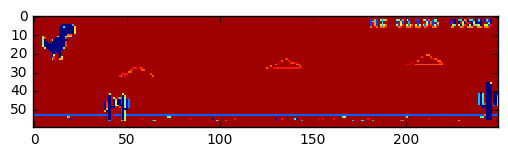

In [13]:
from matplotlib import pyplot as plt
plt.imshow(train_data[1200][0], interpolation='nearest')
plt.show()

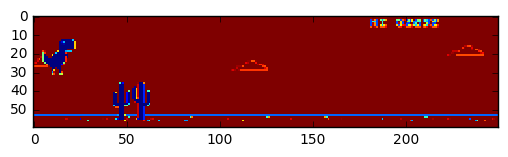

In [14]:
from matplotlib import pyplot as plt
plt.imshow(train_data[-5][0], interpolation='nearest')
plt.show()

In [15]:
df = pd.DataFrame(train_data, columns=["Image","KeyPress"])

In [16]:
df.head()

,Image,KeyPress
0,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[1, 0, 0]"
1,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[1, 0, 0]"
2,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[1, 0, 0]"
3,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[1, 0, 0]"
4,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[1, 0, 0]"


In [17]:
Counter(df['KeyPress'].apply(str))

Counter({'[0, 0, 1]': 636, '[0, 1, 0]': 1920, '[1, 0, 0]': 8443})

In [18]:
len(train_data)

10999

In [19]:
initial_train_steps = train_data[:1000]

In [20]:
len(initial_train_steps)

1000

In [21]:
concat_train_data = np.concatenate((initial_train_steps,initial_train_steps,initial_train_steps,initial_train_steps))

In [22]:
len(concat_train_data)

4000

In [23]:
train_data = np.concatenate((concat_train_data,train_data))

In [24]:
len(train_data)

14999

In [25]:
straights = []
ups = []
downs = []

#shuffle(train_data)

for i,data in enumerate(train_data):
    img = data[0]
    choice = data[1]

    if choice == [1,0,0]:
        straights.append([img,choice])
    elif choice == [0,1,0]:
        ups.append([img,choice])
    elif choice == [0,0,1]:
        downs.append([img,choice])
    else:
        print('no matches')
print("Done with {} iterations".format(i))        

Done with 14998 iterations


In [26]:
len(straights),len(ups),len(downs)

(11815, 2548, 636)

In [27]:
straights_df = pd.DataFrame(straights, columns=['Image','KeyPress'])

In [28]:
straights_df.head()

,Image,KeyPress
0,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[1, 0, 0]"
1,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[1, 0, 0]"
2,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[1, 0, 0]"
3,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[1, 0, 0]"
4,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[1, 0, 0]"


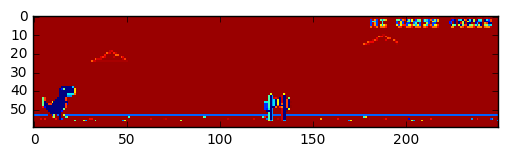

In [36]:
from matplotlib import pyplot as plt
plt.imshow(np.array(straights_df["Image"][10000]), interpolation='nearest')
plt.show()

In [29]:
up_df = pd.DataFrame(ups, columns=['Image','KeyPress'])

In [30]:
up_df.head()

,Image,KeyPress
0,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[0, 1, 0]"
1,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[0, 1, 0]"
2,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[0, 1, 0]"
3,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[0, 1, 0]"
4,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[0, 1, 0]"


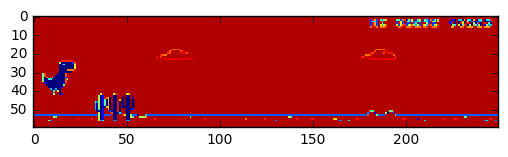

In [37]:
from matplotlib import pyplot as plt
plt.imshow(np.array(up_df["Image"][2000]), interpolation='nearest')
plt.show()

In [31]:
down_df = pd.DataFrame(downs, columns=['Image','KeyPress'])

In [32]:
down_df.head()

,Image,KeyPress
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 1]"
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 1]"
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 1]"
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 1]"
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 1]"


In [39]:
down_df.tail()

,Image,KeyPress
631,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[0, 0, 1]"
632,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[0, 0, 1]"
633,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[0, 0, 1]"
634,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[0, 0, 1]"
635,"[[247, 247, 247, 247, 247, 247, 247, 247, 247,...","[0, 0, 1]"


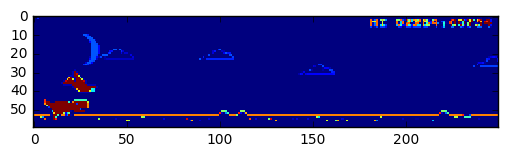

In [41]:
from matplotlib import pyplot as plt
plt.imshow(np.array(down_df["Image"][200]), interpolation='nearest')
plt.show()

#### Balancing straights, ups and downs

In [42]:
ups = ups * 5

In [43]:
downs = downs * 18

In [44]:
len(straights),len(ups),len(downs)

(11815, 12740, 11448)

In [45]:
final_data = straights + ups + downs

In [46]:
shuffle(final_data)

In [47]:
np.save('final_training_data.npy', final_data)

<hr>